In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
url = 'https://raw.githubusercontent.com/rodmsmendes/reinforcementlearning4fun/master/data/house_prices.csv'
df = pd.read_csv(url)


In [3]:
df_float = df.select_dtypes(include=['float64']).copy()
df_float.info()
df_float.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [8]:
df_float['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=False)
df_float['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=False)
df_float['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=False)

In [9]:
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
 2   GarageYrBlt  1460 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [10]:
lotFrontage = df_float['LotFrontage'].values.reshape(-1, 1)
salePrice= df['SalePrice'].values


In [25]:
def gradient_descent_step(m_now,b_now,x,y,lr):
    m_gradient = -2 * np.mean(x * (y - (m_now * x + b_now)))
    b_gradient = -2 * np.mean(y - (m_now * x + b_now))
    
    m_next = m_now - lr * m_gradient
    b_next = b_now - lr * b_gradient
    
    return m_next, b_next

Epoch 0: m=2534.7044480033765, b=36.184239178082194
Epoch 100: m=2345.930902609778, b=358.68433321839296
Epoch 200: m=2341.7172984782374, b=682.9986358487245
Epoch 300: m=2337.5112625405236, b=1006.7304268270883
Epoch 400: m=2333.3127812031544, b=1329.8807524219412
Epoch 500: m=2329.121840897062, b=1652.4506570225005
Epoch 600: m=2324.9384280775503, b=1974.441183142123
Epoch 700: m=2320.7625292242515, b=2295.853371421673
Epoch 800: m=2316.5941308410825, b=2616.6882606328872
Epoch 900: m=2312.4332194562003, b=2936.9468876817245


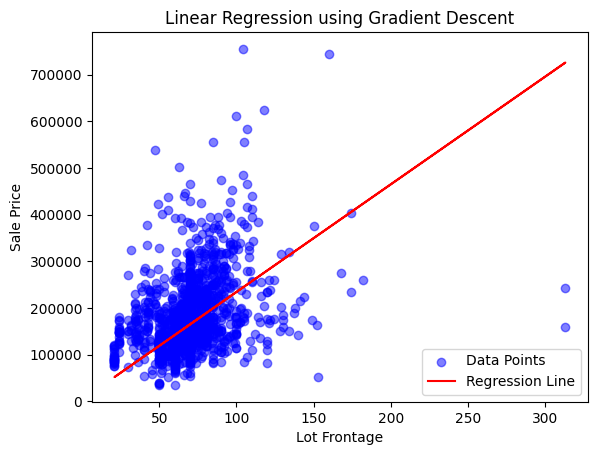

In [27]:
m=0
b=0
L=0.0001
epoch=1000
for i in range(epoch):
    m, b = gradient_descent_step(m, b, lotFrontage, salePrice, L)
    if i % 100 == 0:
        print(f'Epoch {i}: m={m}, b={b}')
plt.scatter(lotFrontage, salePrice, color='blue', label='Data Points', alpha=0.5)
plt.plot(lotFrontage, m * lotFrontage + b, color='red', label='Regression Line')
plt.xlabel('Lot Frontage')
plt.ylabel('Sale Price')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()


In [28]:
masVnrAre = df_float[['MasVnrArea']].values.reshape(-1, 1)
salePrice = df['SalePrice'].values


Epoch 0: m=37.517723088839205, b=0.3618423917808219
Epoch 100: m=432.78867263183497, b=28.512683704476434
Epoch 200: m=432.76928119667815, b=55.71359579605137
Epoch 300: m=432.7042110322319, b=82.91030838537009
Epoch 400: m=432.639145372392, b=110.10293139689345
Epoch 500: m=432.5740894958542, b=137.2914654582029
Epoch 600: m=432.5090434017577, b=164.4759111841546
Epoch 700: m=432.4440070886316, b=191.65626918951094
Epoch 800: m=432.37898055500517, b=218.8325400889419
Epoch 900: m=432.3139637994078, b=246.00472449702482


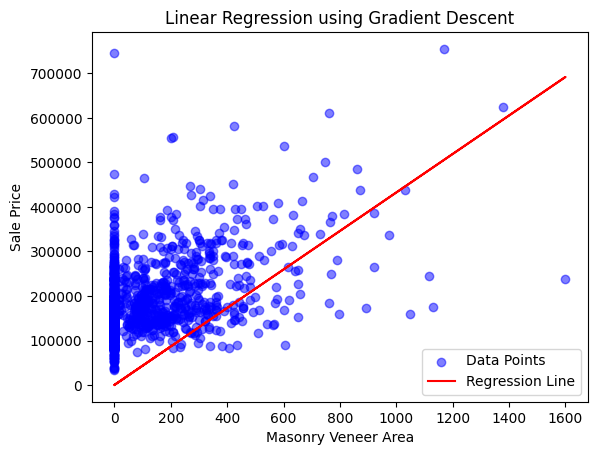

In [32]:
m=0
b=0
L=0.000001
epoch=1000
for i in range(epoch):
    m, b = gradient_descent_step(m, b, masVnrAre, salePrice, L)
    if i % 100 == 0:
        print(f'Epoch {i}: m={m}, b={b}')
plt.scatter(masVnrAre, salePrice, color='blue', label='Data Points', alpha=0.5)
plt.plot(masVnrAre, m * masVnrAre + b, color='red', label='Regression Line')
plt.xlabel('Masonry Veneer Area')
plt.ylabel('Sale Price')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()

In [34]:
garageYrBlt = df_float[['GarageYrBlt']].values.reshape(-1, 1)
salePrice = df['SalePrice'].values


Epoch 0: m=0.7159074024939255, b=0.00036184239178082195
Epoch 100: m=50.09869551182958, b=0.02532312511280288
Epoch 200: m=72.5985244573976, b=0.036698901244602
Epoch 300: m=82.84991612486783, b=0.041884837026773376
Epoch 400: m=87.52066412727261, b=0.044250552355459945
Epoch 500: m=89.64875440042357, b=0.045331316383789795
Epoch 600: m=90.61835674348056, b=0.045826629781035674
Epoch 700: m=91.06012780640395, b=0.04605519965162686
Epoch 800: m=91.2614079215581, b=0.04616223560418221
Epoch 900: m=91.35311534154293, b=0.046213898167105964


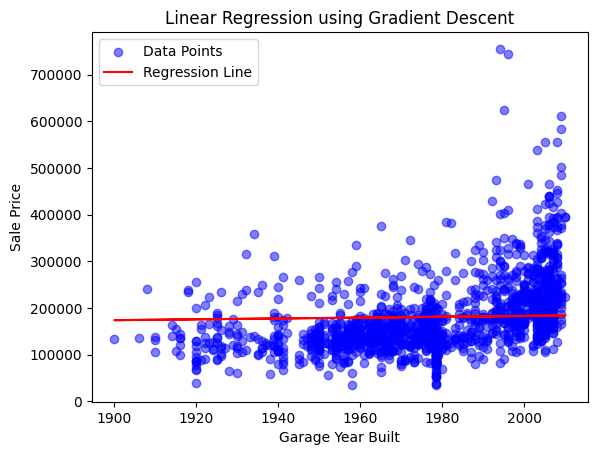

In [37]:
m=0
b=0
L=0.000000001
epoch=1000
for i in range(epoch):
    m, b = gradient_descent_step(m, b, garageYrBlt, salePrice, L)
    if i % 100 == 0:
        print(f'Epoch {i}: m={m}, b={b}')
plt.scatter(garageYrBlt, salePrice, color='blue', label='Data Points', alpha=0.5)
plt.plot(garageYrBlt, m * garageYrBlt + b, color='red', label='Regression Line')
plt.xlabel('Garage Year Built')
plt.ylabel('Sale Price')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()